In [18]:
import pandas as pd

In [20]:
df = pd.read_csv("creditcard.csv")

In [21]:
print("Dataset loaded successfully")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n Column Names: ")
print(list(df.columns))

print("\n First 5 rows: ")
print(df.head())

Dataset loaded successfully
Rows: 284807, Columns: 31

 Column Names: 
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

 First 5 rows: 
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.

In [24]:
#--Data Exploration---
import matplotlib.pyplot as plt
import seaborn as sns


===== Data Exploration =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non

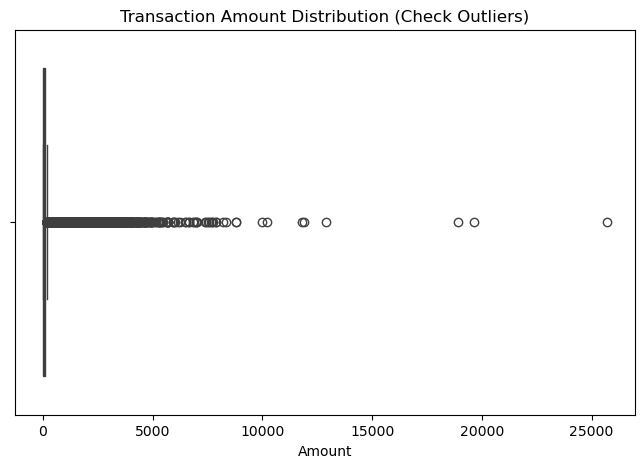

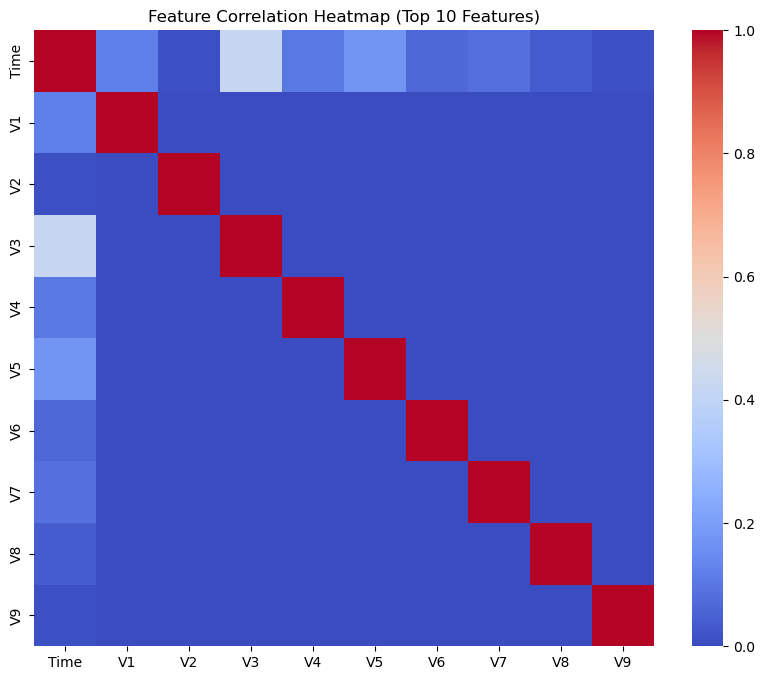

In [26]:
print("\n===== Data Exploration =====")

print(df.info())
print(df.isnull().sum())

fraud_count = df["Class"].value_counts()
print("\nFraud vs Non-Fraud Transactions:")
print(fraud_count)
print(f"\nPercentage of Fraudulent Transactions: {(fraud_count[1]/fraud_count.sum())*100:.4f}%")

print("\nSummary Statistics:")
print(df.describe())

plt.figure(figsize=(8,5))
sns.boxplot(x=df["Amount"])
plt.title("Transaction Amount Distribution (Check Outliers)")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr().abs().iloc[:10, :10],cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap (Top 10 Features)")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [30]:
x = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

smote = SMOTE(random_state = 42)
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

print(f" SMOTE applied. Before: {y.value_counts().to_dict()}, After: {y_resampled.value_counts().to_dict()}")
x_train, x_test, y_train, y_test = train_test_split(
    x_resampled, y_resampled, test_size = 0.2, random_state = 42
)

print(f" Data Split Complete.")
print(f"Training set: {x_train.shape}, Testing set: {x_test.shape}")

 SMOTE applied. Before: {0: 284315, 1: 492}, After: {0: 284315, 1: 284315}
 Data Split Complete.
Training set: (454904, 30), Testing set: (113726, 30)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

y_pred_lr = model.predict(x_test)

print(" Logistic Regression training complete!")
print("\n Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\n Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

 Logistic Regression training complete!

 Accuracy: 0.9500729824314581

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726


 Confusion Matrix:
 [[55361  1389]
 [ 4289 52687]]


In [38]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
import matplotlib.pyplot as plt


===== Model Evaluation =====
 Accuracy:  0.9501
 Precision: 0.9743
 Recall:    0.9247
 F1-Score:  0.9489
 ROC-AUC:   0.9501


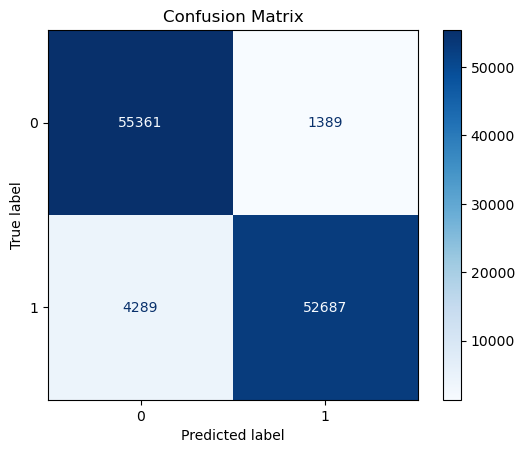

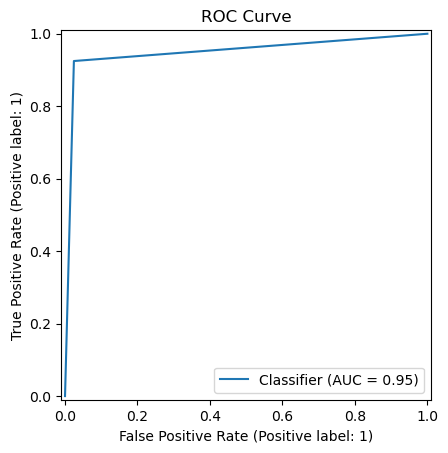

In [40]:
print("\n===== Model Evaluation =====")

predictions = y_pred_lr

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print(f" Accuracy:  {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall:    {recall:.4f}")
print(f" F1-Score:  {f1:.4f}")
print(f" ROC-AUC:   {roc_auc:.4f}")

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

RocCurveDisplay.from_predictions(y_test, predictions)
plt.title("ROC Curve")
plt.show()

In [42]:
import joblib
import os
import numpy as np

In [46]:
print("\n===== Real-Time Fraud Detection Simulation =====")

os.makedirs("results", exist_ok=True)

try:
    trained_model = log_model
except NameError:
    trained_model = model

joblib.dump(trained_model, "results/logistic_fraud_model.pkl")
print("Model saved successfully as 'results/logistic_fraud_model.pkl'")

loaded_model = joblib.load("results/logistic_fraud_model.pkl")
print("Model loaded successfully for prediction!")

sample_transaction = x_test[0].reshape(1, -1)

prediction = loaded_model.predict(sample_transaction)

if prediction[0] == 1:
    print("Prediction: Fraudulent Transaction Detected!")
else:
    print("Prediction: Legitimate Transaction.")


===== Real-Time Fraud Detection Simulation =====
Model saved successfully as 'results/logistic_fraud_model.pkl'
Model loaded successfully for prediction!
Prediction: Fraudulent Transaction Detected!


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


===== Step 7: Feature Importance =====
Model does not support built-in feature importances. Calculating correlation-based importances instead...

Top 10 Influential Features:
   Feature  Importance  Abs_Importance
2       V2    0.004134        0.004134
11     V11    0.004060        0.004060
19     V19    0.003686        0.003686
25     V25    0.003570        0.003570
14     V14    0.003334        0.003334
29  Amount    0.003274        0.003274
4       V4    0.003185        0.003185
12     V12    0.003137        0.003137
15     V15    0.003047        0.003047
3       V3    0.002851        0.002851


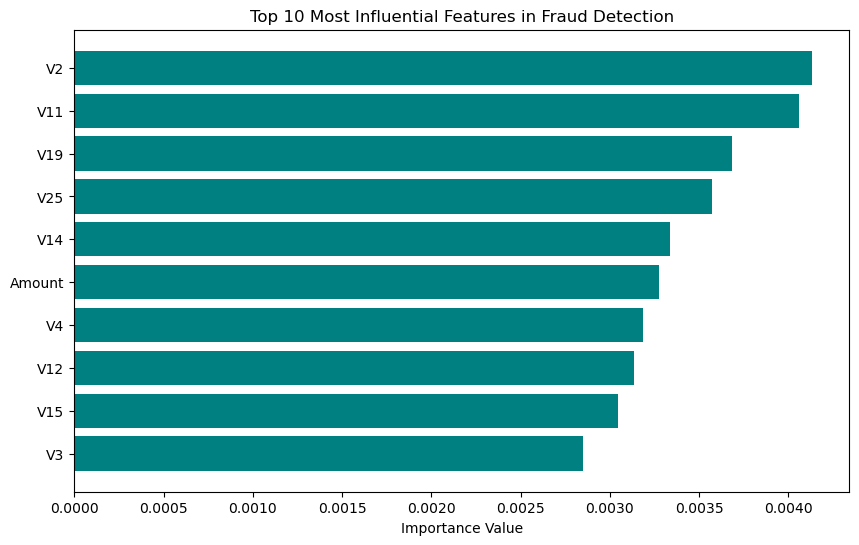

In [74]:
print("\n===== Step 7: Feature Importance =====")

possible_models = ["log_model", "model", "rf_model", "gb_model"]
model_used = None

for m in possible_models:
    if m in globals():
        model_used = globals()[m]
        break

if model_used is None:
    raise NameError("No trained model found. Please train a model before this step.")

if "data" in globals():
    feature_names = data.drop("Class", axis=1).columns
elif "df" in globals():
    feature_names = df.drop("Class", axis=1).columns
else:
    raise NameError("No dataset variable found (expected 'data' or 'df').")

if hasattr(model_used, "coef_"):
    print("Using Logistic Regression coefficients.")
    importances = model_used.coef_[0]
elif hasattr(model_used, "feature_importances_"):
    print("Using feature_importances_ from tree-based model.")
    importances = model_used.feature_importances_
else:
    print("Model does not support built-in feature importances. Calculating correlation-based importances instead...")
    corr = np.abs(pd.DataFrame(x_train, columns=feature_names).corrwith(pd.Series(y_train)))
    importances = corr.values

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances,
    "Abs_Importance": np.abs(importances)
}).sort_values("Abs_Importance", ascending=False)

print("\nTop 10 Influential Features:")
print(importance_df.head(10))

plt.figure(figsize=(10,6))
plt.barh(importance_df["Feature"].head(10),
         importance_df["Abs_Importance"].head(10),
         color="teal")
plt.gca().invert_yaxis()
plt.title("Top 10 Most Influential Features in Fraud Detection")
plt.xlabel("Importance Value")
plt.show()


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [62]:
print("\n===== Cross-Validation (Logistic Regression) =====")
try:
    model_used = log_model
except NameError:
    try:
        model_used = model
    except NameError:
        
        model_used = LogisticRegression(max_iter=1000, random_state=42)
        print("Re-initialized a new Logistic Regression model for cross-validation.")

cv_scores = cross_val_score(model_used, x_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


===== Cross-Validation (Logistic Regression) =====
Cross-Validation Scores: [0.94809905 0.94941801 0.94798914 0.94859366 0.9479446 ]
Mean Accuracy: 0.9484
Standard Deviation: 0.0006


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd

In [108]:
print("\n===== Model Comparison (Logistic Regression vs Random Forest vs Gradient Boosting) =====")

models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=30, max_depth = 3,
                                                    subsample = 0.8, learning_rate=0.1, random_state=42)
}

results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train, y_train)
    print(f"\n Finished Training {name}...")
    preds = model.predict(x_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds)
    })
    
comparison_df = pd.DataFrame(results).sort_values("F1 Score", ascending=False)
print("\n===== Model Comparison Results =====")
print(comparison_df)


===== Model Comparison (Logistic Regression vs Random Forest vs Gradient Boosting) =====

Training Logistic Regression...

 Finished Training Logistic Regression...

Training Random Forest...

 Finished Training Random Forest...

Training Gradient Boosting...

 Finished Training Gradient Boosting...

===== Model Comparison Results =====
                 Model  Accuracy  Precision    Recall  F1 Score
1        Random Forest  0.999894   0.999789  1.000000  0.999895
2    Gradient Boosting  0.955525   0.980669  0.929549  0.954425
0  Logistic Regression  0.950073   0.974314  0.924723  0.948871
